In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualize multiple time series

En nuestro día a día, es probable que nos encontremos con situaciones en las cuales necesitamos trabajar con múltiples series temporales a la vez. Si tenemos múltiples series en un único DataFrame, podemos hacer uso del comando plot, para plotear un gráfico de tipo línea en un mismo gráfico cada una de las series.

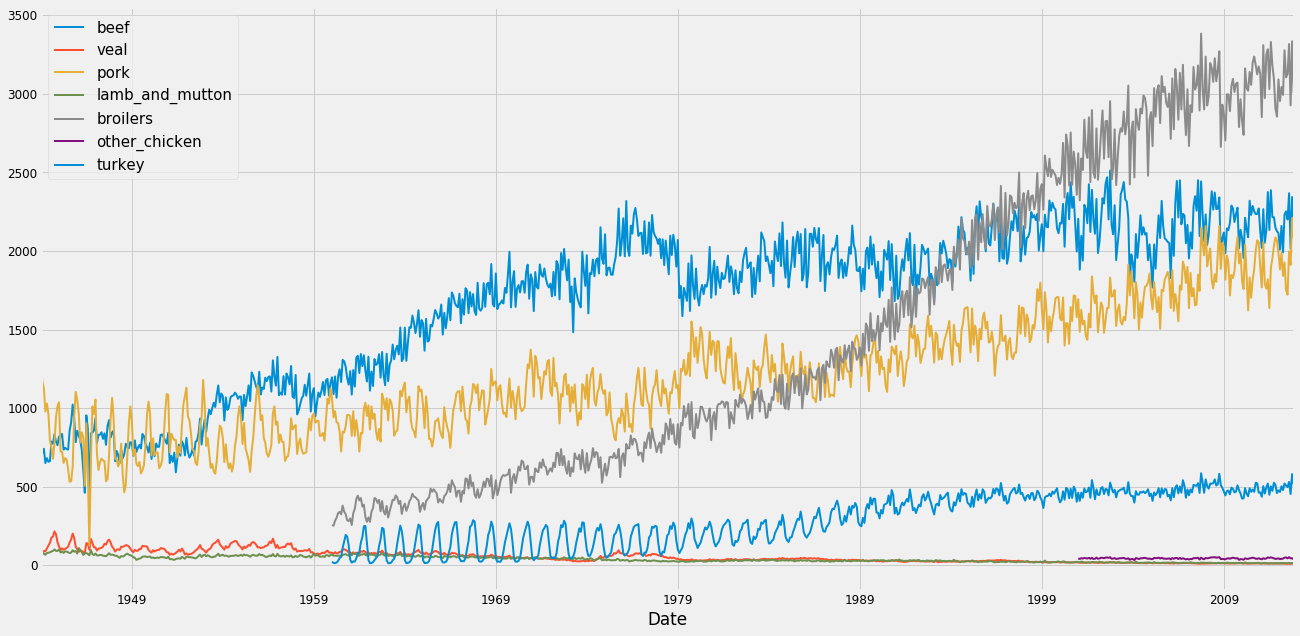

In [15]:
#Cargamos los datos
df = pd.read_csv('ch4_meat.csv', parse_dates = ['date'], index_col = ['date'])

plt.style.use('fivethirtyeight')
ax = df.plot(figsize = (20,10), linewidth = 2, fontsize = 12)
ax.set_xlabel('Date')
ax.legend(fontsize = 15)
plt.show()

También disponemos del gŕafico plot.area

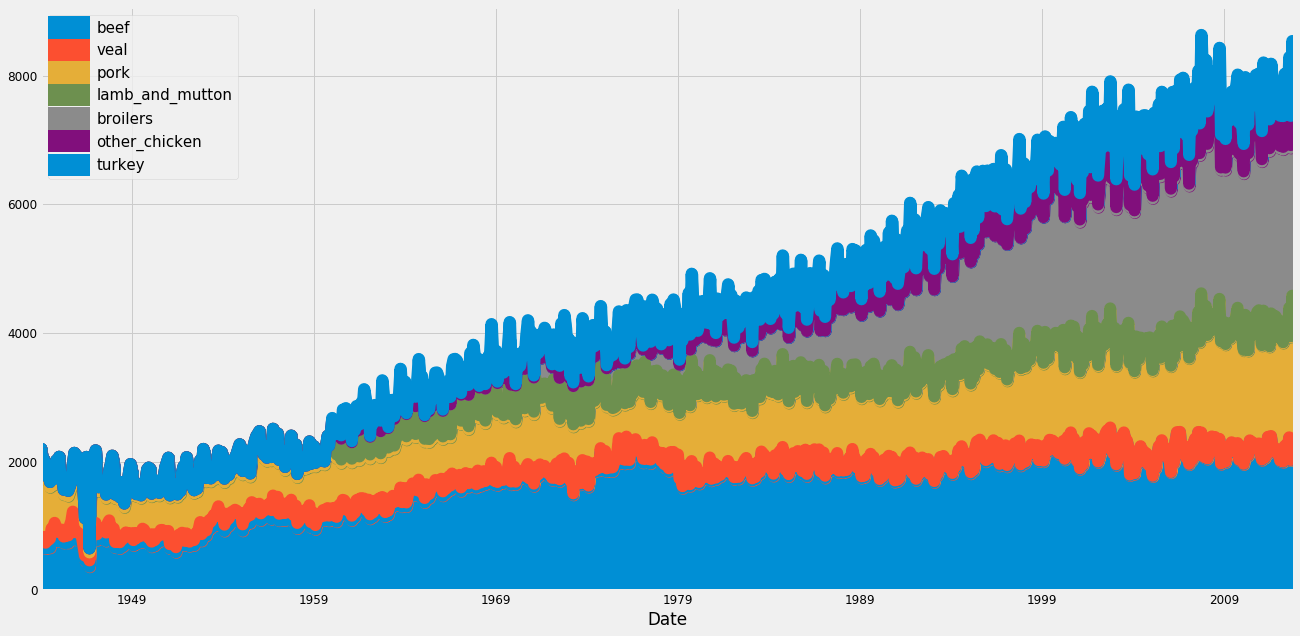

In [16]:
ax = df.plot.area(figsize = (20,10), linewidth = 12, fontsize = 12)
ax.set_xlabel('Date')
ax.legend(fontsize = 15)
plt.show()

# Define the color palette of your plots

Cuando viasualizamos múltiples series temporales, puede ser realmente complicado diferenciar entre colores cuando hacemos uso del esquema que presenta matplotlib por defecto. Para remediar esto, podemos definir manualmente nuestra paleta de colores, aunque esto nos puede llevar bastante tiempo. La función **plot()** dispone del argumento **colormap** este argumento nos permite seleccionar el mapa de colores que deseamos utilizar en nuestro gráfico. [https://matplotlib.org/examples/color/colormaps_reference.html] se puede ver toda la gama que dispone matplotlib.

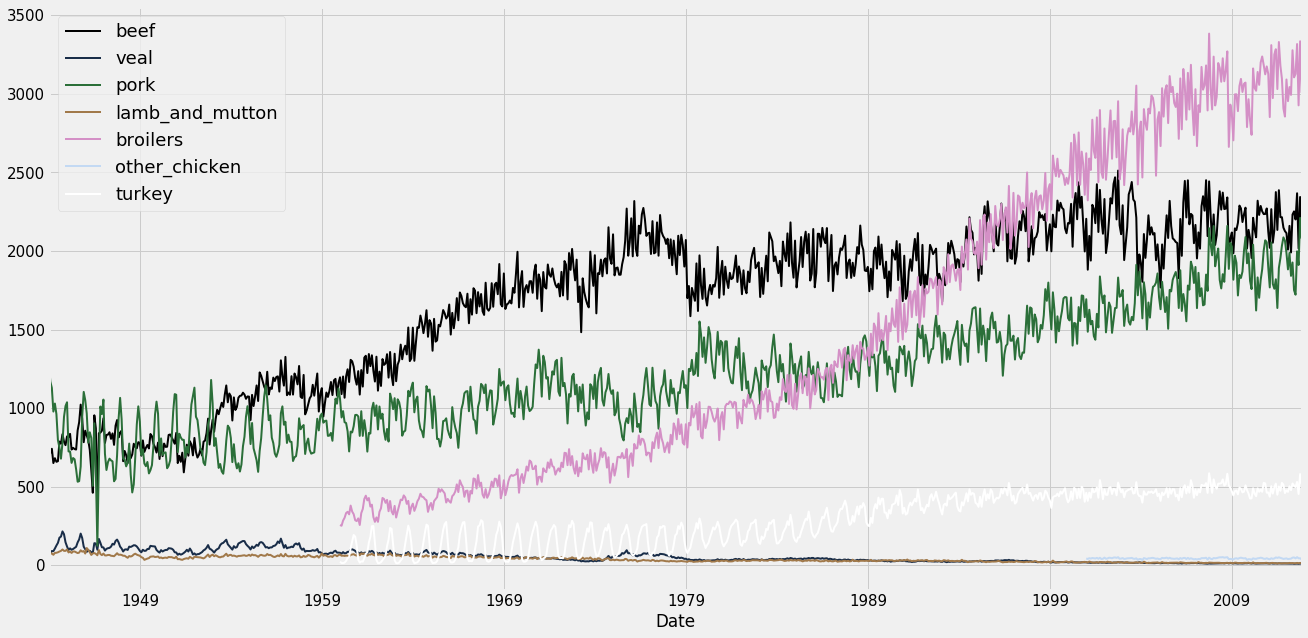

In [21]:
#Nos creamos nuestro gŕafico con un nuevo mapa de colores (cubehelix)
ax = df.plot(colormap = 'cubehelix', fontsize = 15, figsize = (20,10), linewidth = 2)
ax.set_xlabel('Date')
ax.legend(fontsize = 18)
plt.show()

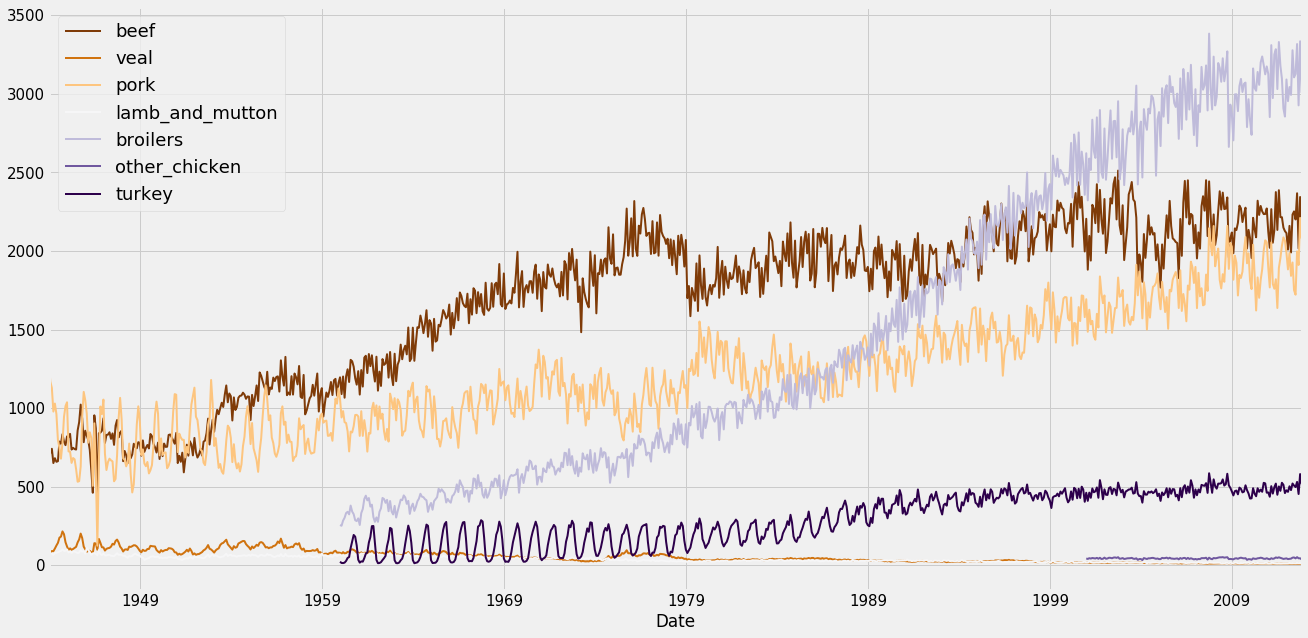

In [24]:
#Nos creamos nuestro gráfico con un nuevo mapa de colores (PuOr)
ax = df.plot(colormap = 'PuOr', fontsize = 15, figsize = (20,10), linewidth = 2)
ax.set_xlabel('Date')
ax.legend(fontsize = 18)
plt.show()

# Add summary statistics to your time series plot

Es posible visualizar nuestro gráficos de series temporales y sus estadísticos respectivos en un solo gráfico.

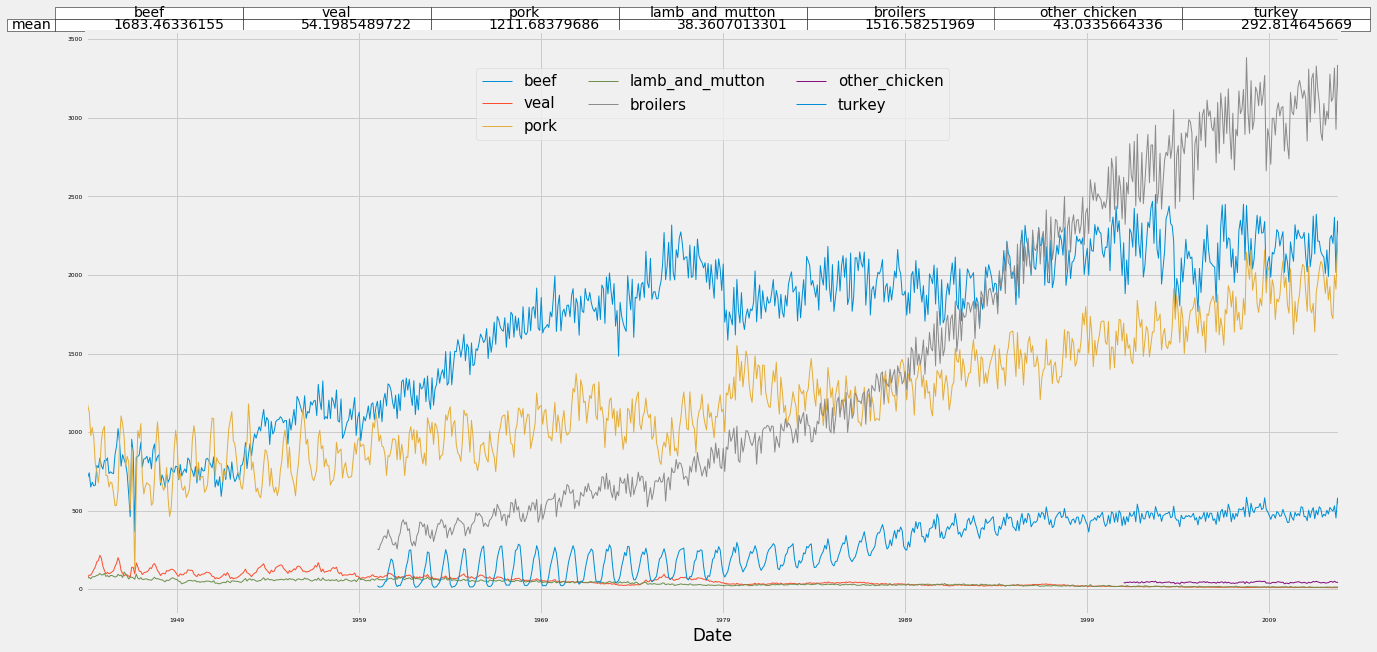

In [51]:
#Calculamos la media 
meat_mean = pd.DataFrame(df.mean())
meat_mean.columns = ['mean']
meat_mean = meat_mean.T

#Nos creamos el gráfico
ax = df.plot(fontsize = 6, linewidth = 1, figsize = (20,10))
ax.set_xlabel('Date')
ax.table(cellText=meat_mean.values,
         colWidths = [0.15]*len(meat_mean.columns),
         rowLabels=meat_mean.index,
         colLabels=meat_mean.columns,
         loc='top')

ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, 0.95), ncol = 3, fontsize = 15)

plt.show()


# Plot your time series on individual plots

CUando tenemos varias series juntas, pero resulta que sus valores son bastante diferentes, puede que sea conveniente representar cada una de las series por separado de esta forma quizás podamos ver patrones que están ocultar por representar las series de forma conjunta. Para esto, la función **plot()** dispone de los argumentos denominado **subplot** y **layout**. Si el argumento **subplot** toma el valor de True, esto indicará que queremos visualizar cada serie un gráfico distinto, mediante el argumento **layout** lo que hacemos es especificar el número de filas y de columnas.

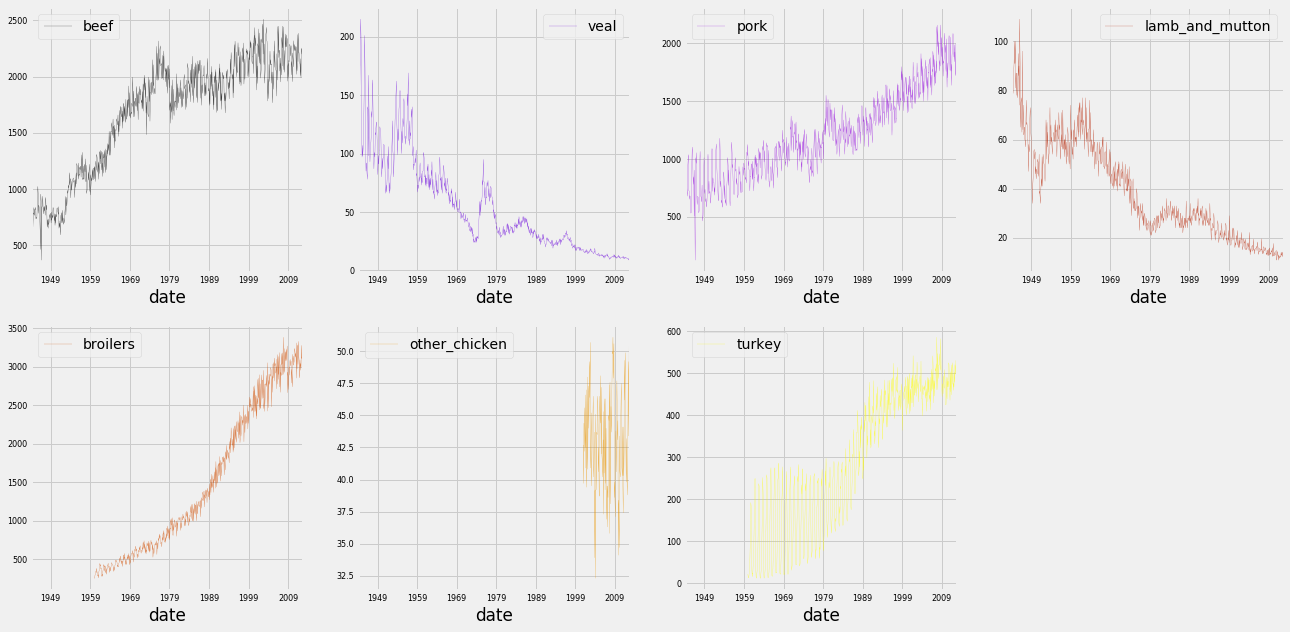

In [64]:
ax = df.plot(subplots = True,
       layout = (2,4),
       sharex = False,
       sharey = False,
       colormap = 'gnuplot',
       fontsize = 8,
       legend = True,
       figsize = (20,10),
       linewidth = 0.2)
plt.show()

# Compute correlations between time series

El coeficiente de correlación puede ser utilizado para determinar como se asocian múltiples variables entre si. El resultado es una matriz de correlación que describe la correlación entre series temporales. Existen varios coeficientes de correlación a partir de los cuales podemos calcular nuestra matriz de correlación: Pearson, Kendall o Spearman. De forma general el coeficiente de Pearson debe ser usado cuando la relación entre variables es lineal, mientras que los otros dos suelen ser usados cuando esta relación no es lineal.

In [65]:
#Mostramos la matriz de correlación entre beef y pork a partir del coeficiente de spearman.
print(df.loc[:, ['beef', 'pork']].corr(method = 'spearman'))

          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000


In [66]:
#Mostramos la matriz de correlación entre beef, pork y turkey a partir del coeficiente de pearson
print(df.loc[:, ['beef', 'pork', 'turkey']].corr(method = 'pearson'))

            beef      pork    turkey
beef    1.000000  0.787047  0.738070
pork    0.787047  1.000000  0.835215
turkey  0.738070  0.835215  1.000000


# Visualize correlation matrices

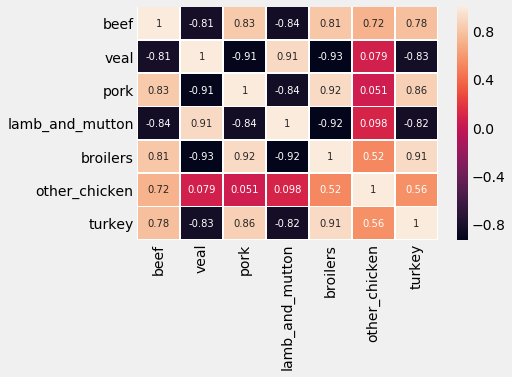

In [68]:
import seaborn as sns

#Obtenemos las matriz de correlación
corr_df = df.corr(method = 'spearman')

#NOs creamos nuestro heatmap 
sns.heatmap(corr_df,
           annot = True,
           linewidths = 0.4,
           annot_kws = {'size':10})

#Rotamos los ejes
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

#Mostramos el resultado
plt.show()

# Clustered heatmaps

Los heatmaps se tratan de gráficos bastante útiles a la hora de visualizar las matrices de correlación, pero los clustermaps son aún más potentes. Un clustermap nos permite ver la estructura de una matriz de correlación.

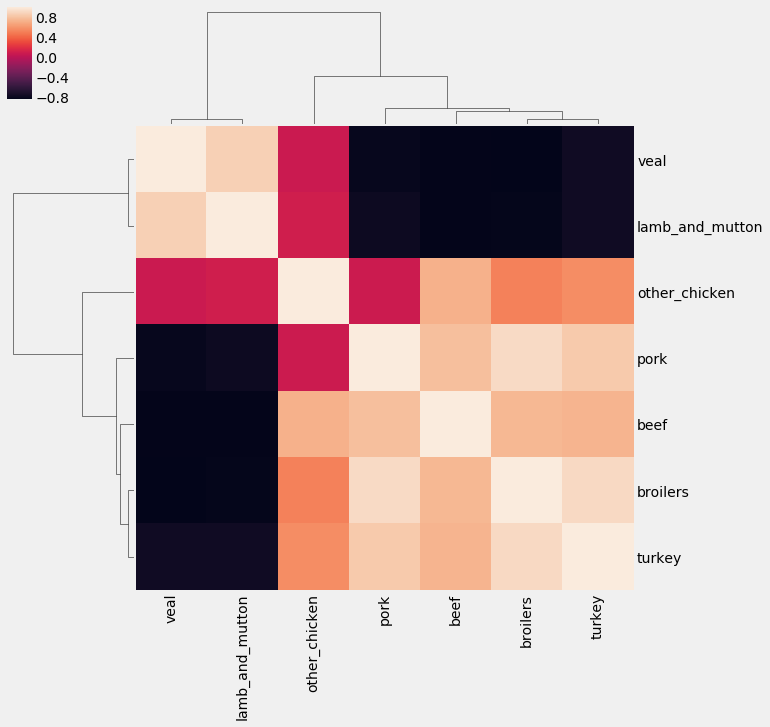

In [71]:
#Nos creamos la matriz de correlación
corr_df = df.corr(method = 'pearson')

fig = sns.clustermap(corr_df,
                    row_cluster = True,
                    col_cluster = True, 
                    figsize = (10,10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()